In [1]:
import os
import numpy
from sklearn import linear_model
from matplotlib import pyplot
from matplotlib import rc
%matplotlib inline

Se trabaja en un principio con E = 5000 y N = 5000, así como los 1000000 ciclos que vienen por defecto en el programa. Hay que iniciar el jupyter nb en CINV-don_elias/Tareas/Mec_Estadistica/StatMechPrograms, o de lo contrario dar la ruta absoluta

In [2]:
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex = False)
rc('font', family = 'serif')
pyplot.rcParams["mathtext.fontset"] = "stix"

In [3]:
# f_1 = open('CoupledHarmonicOscillators/P1/res_1/hist.dat', 'r')

folders = []
counter = []
c = 0
f_init = []
f_final = []
Prob = []

for folder in os.listdir("StatMechPrograms/CoupledHarmonicOscillators/P1/"):
    if '+' not in folder and '-' not in folder:
        f_1 = open('StatMechPrograms/CoupledHarmonicOscillators/P1/' + folder + '/hist.dat', 'r')
        folders.append(folder)
        f_ij = []
        f_fj = []
        Prob_j = []
        for line in f_1:
            if '#Range' not in line:
                x = line.split()
                f_ij.append(float(x[0]))
                f_fj.append(float(x[1]))
                Prob_j.append(float(x[-1]))
        f_1.close()
        counter.append(c)
        c += 1
        f_init.append(f_ij)
        f_final.append(f_fj)
        Prob.append(Prob_j) 


In [4]:
indexes = []
c = 0
for name in folders:
    index_var = name.split('_')[-1]
    if (index_var != '10-1') and (index_var != '10+1'):
        indexes.append(int(index_var))
    elif index_var == '10-1' or index_var == '10+1':
        f_init.pop(c)
    c += 1

print(indexes)

[5, 4, 2, 3, 6, 1, 7, 11, 10, 9, 12, 8]


In [5]:
f_init = [x for _,x in sorted(zip(indexes,f_init))]
f_final = [x for _,x in sorted(zip(indexes, f_final))]
# print(indexes)
Prob = [x for _,x in sorted(zip(indexes, Prob))]
folders = [x for _,x in sorted(zip(indexes, folders))]
counter = [x for _,x in sorted(zip(indexes, counter))]

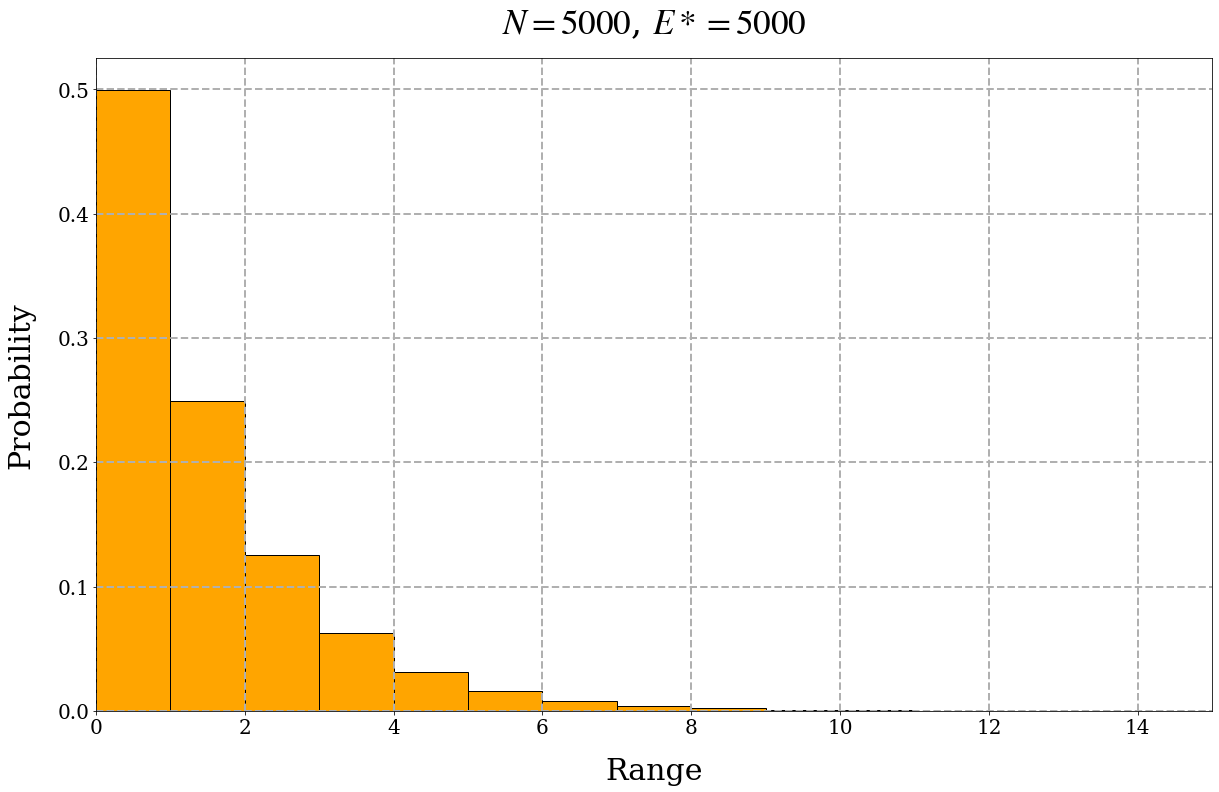

In [6]:
fig1 = pyplot.figure(figsize = (20,12))
pyplot.title(r'$N = 5000$, $E* = 5000$', fontsize = 35, pad = 25)
pyplot.grid(linestyle = '--', alpha = 1, linewidth = 2)
pyplot.xlim(0,15)
pyplot.xticks(fontsize = 20)
pyplot.xlabel(r"Range", fontsize = 30, labelpad = 20)
pyplot.ylabel(r"Probability", fontsize = 30, labelpad = 22)
pyplot.yticks(fontsize = 20)
pyplot.hist(f_init[0], weights = Prob[0], bins = len(f_init[0])-1, edgecolor = 'k', color = 'orange')
fig1.savefig("/home/thanikkitz/Pega/CINV-don_elias/Clases_doc/Bio_Compu/Tarea1/Informe/Figs/P3/res1exp.pdf", bbox_inches = 'tight')

In [7]:
folders

['res_1',
 'res_2',
 'res_3',
 'res_4',
 'res_5',
 'res_6',
 'res_7',
 'res_8',
 'res_9',
 'res_10',
 'res_11',
 'res_12']

El siguiente segmento es para ver la convergencia en función de la cantidad de ciclos.

Pregunta 3 de la tarea, sobre el valor de $\beta$ para distintas combinaciones de N-E

In [8]:
fitted = numpy.array(f_init[0])


In [9]:
reg = linear_model.LinearRegression()
reg.fit(fitted.reshape(-1, 1), Prob[0])

LinearRegression()

In [10]:
X_val = [(f_init[0][-1] + f_final[0][-1])/2 + 0.14, f_init[0][0]]
Y_val = [Prob[0][-1], Prob[0][0]+0.07]

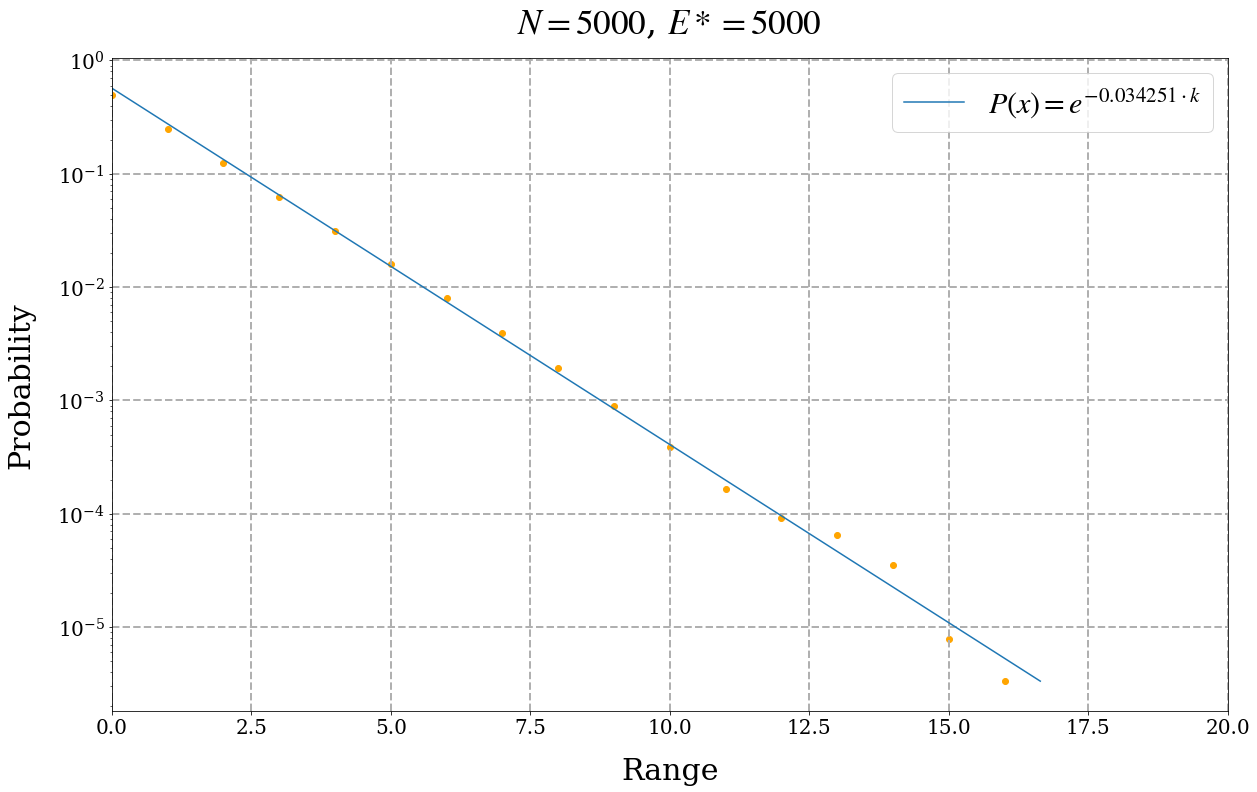

In [11]:
fig1_1 = pyplot.figure(figsize = (20,12))
pyplot.grid(linestyle = '--', alpha = 1, linewidth = 2)
pyplot.yscale('log')
pyplot.plot(X_val,Y_val, label = r'$P(x) = e^{-0.034251\cdot k}$')
pyplot.xlim(0,20)
pyplot.xticks(fontsize = 20)
pyplot.title(r'$N = 5000$, $E* = 5000$', fontsize = 35, pad = 25)
pyplot.xlabel(r"Range", fontsize = 30, labelpad = 20)
pyplot.ylabel(r"Probability", fontsize = 30, labelpad = 22)
pyplot.yticks(fontsize = 20)
pyplot.scatter(f_init[0], Prob[0], color = 'orange')
pyplot.legend(fontsize = 30)
fig1_1.savefig("/home/thanikkitz/Pega/CINV-don_elias/Clases_doc/Bio_Compu/Tarea1/Informe/Figs/P3/res1.pdf", bbox_inches = 'tight')

In [12]:
pyplot.rcParams['xtick.labelsize'] = 18
pyplot.rcParams['ytick.labelsize'] = 18


In [13]:
folders[6:10]

['res_7', 'res_8', 'res_9', 'res_10']

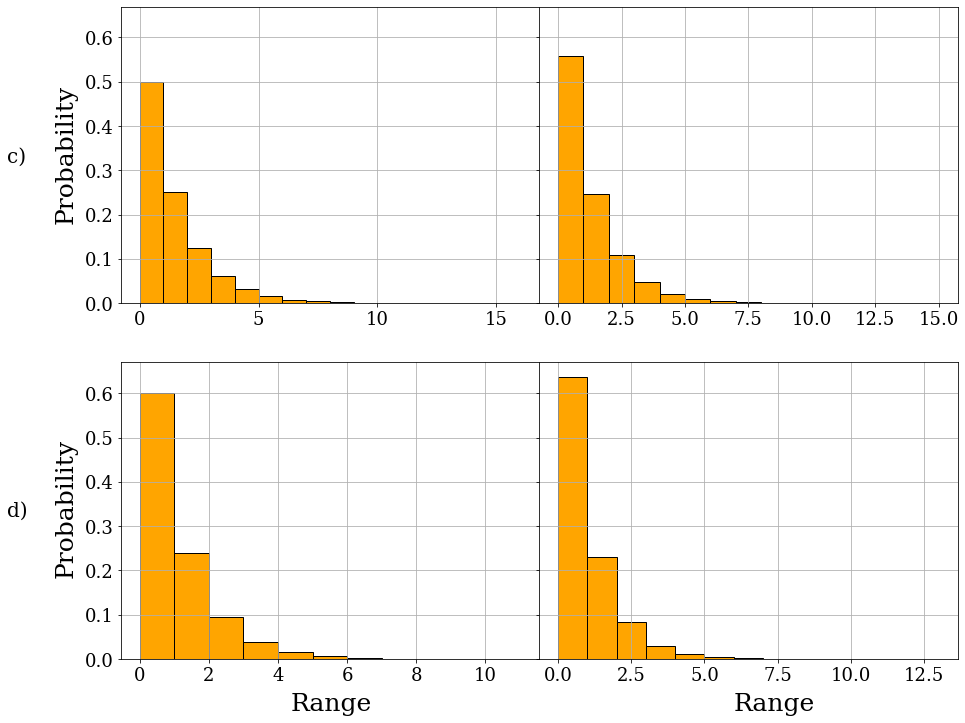

In [14]:
fig22, p22_1 = pyplot.subplots(2,2, figsize = (15,12), sharey = True, gridspec_kw = {'wspace': 0})
# fig22.suptitle('Probability v/s Range', fontsize = 30)
# Axes titles
fig22.text(0.075, 0.635, 'Probability', fontsize = 25, ha='center', rotation = 'vertical')
fig22.text(0.075, 0.225, 'Probability', fontsize = 25, ha='center', rotation = 'vertical')
fig22.text(0.32, 0.065, 'Range', fontsize = 25, ha='center')
fig22.text(0.73, 0.065, 'Range', fontsize = 25, ha='center')

fig22.text(0.02, 0.7, 'c)', fontsize = 20)
p22_1[0][0].hist(f_init[6], weights = Prob[6], bins = len(f_init[6])-1, edgecolor = 'k', color = 'orange')
# p22_1[0][0].spines['right'].set_visible(False)
p22_1[0][0].grid()

p22_1[0][1].hist(f_init[7], weights = Prob[7], bins = len(f_init[7])-1, edgecolor = 'k', color = 'orange')
# p22_1[0][1].yaxis.set_visible(False)
# p22_1[0][1].spines['left'].set_visible(False)
p22_1[0][1].grid()

fig22.text(0.02, 0.29, 'd)', fontsize = 20)
p22_1[1][0].hist(f_init[8], weights = Prob[8], bins = len(f_init[8])-1, edgecolor = 'k', color = 'orange')
p22_1[1][0].grid()

p22_1[1][1].hist(f_init[9], weights = Prob[9], bins = len(f_init[9])-1, edgecolor = 'k', color = 'orange')
p22_1[1][1].grid()
fig22.savefig("/home/thanikkitz/Pega/CINV-don_elias/Clases_doc/Bio_Compu/Tarea1/Informe/Figs/P3/plots-2.pdf", bbox_inches = 'tight')

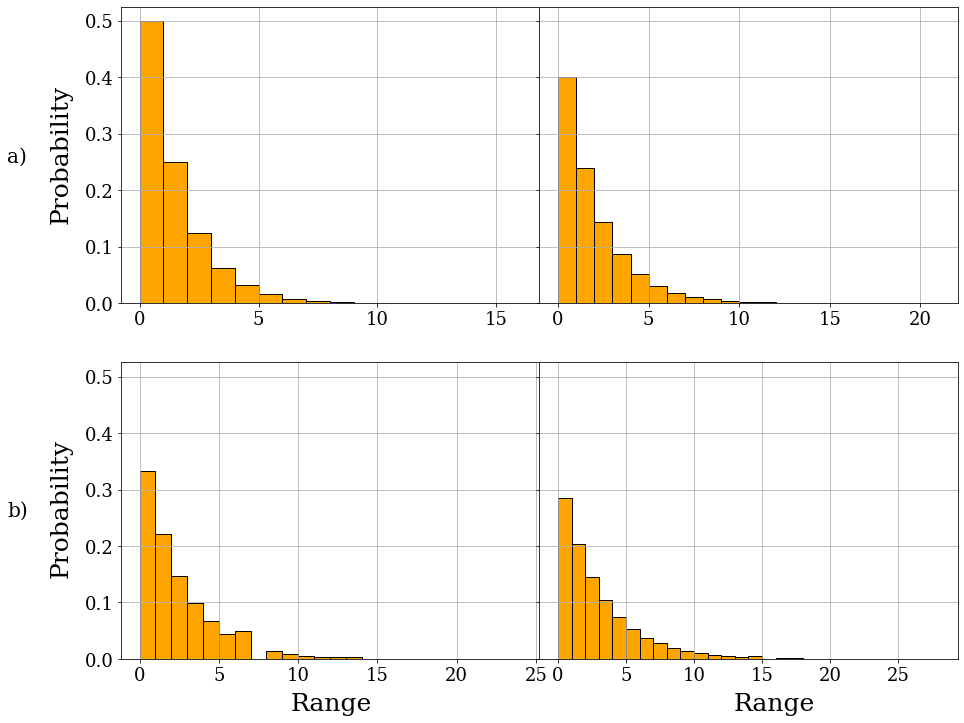

In [15]:
figurethingy, p12_1 = pyplot.subplots(2,2, figsize = (15,12), sharey = True, gridspec_kw = {'wspace': 0})
figurethingy.text(0.07, 0.635, 'Probability', fontsize = 25, ha='center', rotation = 'vertical')
figurethingy.text(0.07, 0.225, 'Probability', fontsize = 25, ha='center', rotation = 'vertical')
figurethingy.text(0.32, 0.065, 'Range', fontsize = 25, ha='center')
figurethingy.text(0.73, 0.065, 'Range', fontsize = 25, ha='center')

figurethingy.text(0.02, 0.7, 'a)', fontsize = 20)
p12_1[0][0].hist(f_init[0], weights = Prob[0], bins = len(f_init[0])-1, edgecolor = 'k', color = 'orange')
p12_1[0][0].grid()
p12_1[0][1].hist(f_init[1], weights = Prob[1], bins = len(f_init[1])-1, edgecolor = 'k', color = 'orange')
p12_1[0][1].grid()

figurethingy.text(0.02, 0.29, 'b)', fontsize = 20)
p12_1[1][0].hist(f_init[2], weights = Prob[2], bins = len(f_init[2])-1, edgecolor = 'k', color = 'orange')
p12_1[1][0].grid()
p12_1[1][1].hist(f_init[3], weights = Prob[3], bins = len(f_init[3])-1, edgecolor = 'k', color = 'orange')
p12_1[1][1].grid()
figurethingy.savefig("/home/thanikkitz/Pega/CINV-don_elias/Clases_doc/Bio_Compu/Tarea1/Informe/Figs/P3/plots-1.pdf", bbox_inches = 'tight')

In [16]:
log_prob = []
zeros = []
preds = []
betas = []
inters = []

for i in range(len(Prob)):
    reg = linear_model.LinearRegression()
    x_axis = numpy.array(f_init[i]).reshape(-1, 1)
    prob = numpy.array(Prob[i])
    indexes = []
    for j in range(len(prob)):
        if prob[j] == 0.0:
            prob[j] = 1e-15
    
#     prob = list(prob)
#     x_axis = list(x_axis)
#     for k in range(len(indexes)):
#         prob.pop(indexes[k])
#         x_axis.pop(indexes[k])
#     prob = numpy.array(prob)
#     x_axis = numpy.array(x_axis)
    prob = numpy.log(prob)
    log_prob.append(reg.fit(x_axis, prob))
    preds.append(reg.predict(x_axis))
    betas.append(reg.coef_)
    inters.append(reg.intercept_)

In [24]:
print(Prob[6][0])
print(numpy.exp(inters[6]))
print(betas[6:10])

0.49909
0.5515542395362747
[array([-0.71506604]), array([-0.7772296]), array([-0.93195354]), array([-0.94947551])]


In [ ]:
numpy.exp(-0.93195354*1)/(Prob[8][0])

In [ ]:
fig32, p32_2 = pyplot.subplots(2,2, figsize = (15,12), sharey = True, gridspec_kw = {'wspace': 0})
fig32.text(0.05, 0.635, 'Probability', fontsize = 25, ha='center', rotation = 'vertical')
fig32.text(0.05, 0.225, 'Probability', fontsize = 25, ha='center', rotation = 'vertical')
fig32.text(0.29, 0.065, 'Range', fontsize = 25, ha='center')
fig32.text(0.73, 0.065, 'Range', fontsize = 25, ha='center')

fig32.text(0.01, 0.7, 'c)', fontsize = 20)
p32_2[0][0].semilogy()
p32_2[0][0].plot(f_init[6], numpy.exp(preds[6]), color = 'orange', label = r'$P(k) = 0.55155424\cdot e^{-0.71506604\cdot k}$')
p32_2[0][0].scatter(f_init[6], Prob[6])
p32_2[0][0].legend(fontsize = 18)

p32_2[0][1].semilogy()
p32_2[0][1].plot(f_init[7], numpy.exp(preds[7]), color = 'orange', label = r'$P(k) = 0.48131267\cdot e^{-0.7772296\cdot k}$')
p32_2[0][1].scatter(f_init[7], Prob[7])
p32_2[0][1].yaxis.set_visible(False)
p32_2[0][1].legend(fontsize = 18)

fig32.text(0.01, 0.29, 'd)', fontsize = 20)
p32_2[1][0].semilogy()
p32_2[1][0].plot(f_init[8], numpy.exp(preds[8]), color = 'orange', label = r'$P(k) = 0.62300288\cdot e^{-0.93195354\cdot k}$')
p32_2[1][0].scatter(f_init[8], Prob[8])
p32_2[1][0].spines['right'].set_visible(False)
p32_2[1][0].legend(fontsize = 18)

p32_2[1][1].semilogy()
p32_2[1][1].plot(f_init[9], numpy.exp(preds[9]), color = 'orange', label = r'$P(k) = 0.49435455\cdot e^{-0.94947551\cdot k}$')
p32_2[1][1].scatter(f_init[9], Prob[9])
p32_2[1][1].yaxis.set_visible(False)
p32_2[1][1].legend(fontsize = 18)
# p32_2[1][1].spines['left'].set_visible(False)

# p32_2[1][1].set_xticklabels([])

fig32.savefig("/home/thanikkitz/Pega/CINV-don_elias/Clases_doc/Bio_Compu/Tarea1/Informe/Figs/P3/plots-linear.pdf", bbox_inches = 'tight')

Pregunta 4, comparación de resultados con distintas distribuciones iniciales

In [ ]:
# P4_hist = open('/home/thanikkitz/Pega/CINV-don_elias/Clases_doc/Bio_Compu/Tarea1/StatMechPrograms/CoupledHarmonicOscillators/hist.dat', 'r')
P4_entropy1 = open('/home/thanikkitz/Pega/CINV-don_elias/Clases_doc/Bio_Compu/Tarea1/StatMechPrograms/CoupledHarmonicOscillators/entropy.dat', 'r')
P4_entropy2 = open('/home/thanikkitz/Pega/CINV-don_elias/Clases_doc/Bio_Compu/Tarea1/StatMechPrograms/CoupledHarmonicOscillators/P1/res_7/entropy.dat', 'r')
P4_entropy3 = open('/home/thanikkitz/Pega/CINV-don_elias/Clases_doc/Bio_Compu/Tarea1/StatMechPrograms/CoupledHarmonicOscillators/P1/res_3/entropy.dat', 'r')
P4_entropy4 = open('/home/thanikkitz/Pega/CINV-don_elias/Clases_doc/Bio_Compu/Tarea1/StatMechPrograms/CoupledHarmonicOscillators/P1/res_1/entropy.dat', 'r')


cyc1 = []
cyc2 = []
cyc3 = []
cyc4 = []
ent1 = []
ent2 = []
ent3 = []
ent4 = []

for lineS in P4_entropy1:
    if '#' not in lineS:
        line = lineS.split()
        cyc1.append(float(line[0]))
        ent1.append(float(line[1]))
        
for lineS in P4_entropy2:
    if '#' not in lineS:
        line = lineS.split()
        cyc2.append(float(line[0]))
        ent2.append(float(line[1]))
        
for lineS in P4_entropy3:
    if '#' not in lineS:
        line = lineS.split()
        cyc3.append(float(line[0]))
        ent3.append(float(line[1]))

for lineS in P4_entropy4:
    if '#' not in lineS:
        line = lineS.split()
        cyc4.append(float(line[0]))
        ent4.append(float(line[1]))
        
        
P4_entropy1.close()
P4_entropy2.close()
P4_entropy3.close()
P4_entropy4.close()

In [ ]:
P4_fig1 = pyplot.figure(figsize = (16,7))
# pyplot.yscale('log')
pyplot.xscale('log')
pyplot.xticks(fontsize = 25)
pyplot.yticks(fontsize = 25)
pyplot.xlabel('Cycles', fontsize = 35)
pyplot.ylabel('Entropy', fontsize = 35)
pyplot.plot(cyc1, ent1, label = 'condition = 1, N = 10000')
pyplot.plot(cyc2, ent2, label = 'condition = 2, N = 10000')
pyplot.plot(cyc3, ent3, label = 'condition = 3, N = 5000')
pyplot.plot(cyc4, ent4, label = 'condition = 3, N = 5000')
pyplot.legend(fontsize = 25);
P4_fig1.savefig("/home/thanikkitz/Pega/CINV-don_elias/Clases_doc/Bio_Compu/Tarea1/Informe/Figs/P4.pdf", bbox_inches = 'tight')

In [ ]:
# f_1 = open('CoupledHarmonicOscillators/P1/res_1/hist.dat', 'r')

folders = []
counter = []
c = 0
f_init = []
f_final = []
Prob = []

for folder in os.listdir("StatMechPrograms/CoupledHarmonicOscillators/Convergence_test/"):
    if '.' not in folder and '-' not in folder:
        f_1 = open('StatMechPrograms/CoupledHarmonicOscillators/Convergence_test/' + folder + '/hist.dat', 'r')
        folders.append(folder)
        f_ij = []
        f_fj = []
        Prob_j = []
        for line in f_1:
            if '#Range' not in line:
                x = line.split()
                f_ij.append(float(x[0]))
                f_fj.append(float(x[1]))
                Prob_j.append(float(x[-1]))
        f_1.close()
        counter.append(c)
        c += 1
        f_init.append(f_ij)
        f_final.append(f_fj)
        Prob.append(Prob_j) 


In [ ]:
figy = pyplot.figure(figsize = (15,12))
# pyplot.xlim(2.5, 7.5)
# pyplot.ylim(0, 0.1)
pyplot.xticks(fontsize = 25)
pyplot.yticks(fontsize = 25)
pyplot.xlabel('Normalized Energy', fontsize = 30, labelpad = 15)
pyplot.ylabel('Probability (logarithmic)', fontsize = 30, labelpad = 15)
pyplot.yscale('log')
pyplot.plot(f_init[0], Prob[0], marker = 'o', markersize = 10, label = r'Cycles = 2.5E5')
pyplot.plot(f_init[1], Prob[1], marker = 'x', markersize = 10, label = r'Cycles = 5E5')
pyplot.plot(f_init[2], Prob[2], marker = '+', markersize = 10, label = r'Cycles = 1E6')
pyplot.plot(f_init[3], Prob[3], marker = '^', markersize = 10, label = r'Cycles = 2E6')
pyplot.plot(f_init[4], Prob[4], marker = '1', markersize = 10, label = r'Cycles = 4E6')
pyplot.plot(f_init[5], Prob[5], marker = '2', markersize = 10, label = r'Cycles = 8E6')
pyplot.legend(fontsize = 25)
# pyplot.show()
figy.savefig("/home/thanikkitz/Pega/CINV-don_elias/Clases_doc/Bio_Compu/Tarea1/Informe/Figs/Convergence-log.pdf", bbox_inches = 'tight')

In [ ]:
fig_2cosa = pyplot.figure(figsize = (15,12))
# pyplot.xlim(2.5, 7.5)
# pyplot.ylim(0, 0.1)
pyplot.xticks(fontsize = 25)
pyplot.yticks(fontsize = 25)
pyplot.xlabel('Normalized Energy', fontsize = 30, labelpad = 15)
pyplot.ylabel('Probability', fontsize = 30, labelpad = 15)
# pyplot.yscale('log')
pyplot.plot(f_init[0], Prob[0], marker = 'o', markersize = 10, label = r'Cycles = 2.5E5')
pyplot.plot(f_init[1], Prob[1], marker = 'x', markersize = 10, label = r'Cycles = 5E5')
pyplot.plot(f_init[2], Prob[2], marker = '+', markersize = 10, label = r'Cycles = 1E6')
pyplot.plot(f_init[3], Prob[3], marker = '^', markersize = 10, label = r'Cycles = 2E6')
pyplot.plot(f_init[4], Prob[4], marker = '1', markersize = 10, label = r'Cycles = 4E6')
pyplot.plot(f_init[5], Prob[5], marker = '2', markersize = 10, label = r'Cycles = 8E6')
pyplot.legend(fontsize = 25)
pyplot.show()
fig_2cosa.savefig("/home/thanikkitz/Pega/CINV-don_elias/Clases_doc/Bio_Compu/Tarea1/Informe/Figs/convergence.pdf", bbox_inches = 'tight')